# Homework Week 2



### Preparing the dataset 

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('car_fuel_efficiency.csv')
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [3]:
df_final = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df_final

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


### EDA

* Look at the `fuel_efficiency_mpg` variable. Does it have a long tail? 

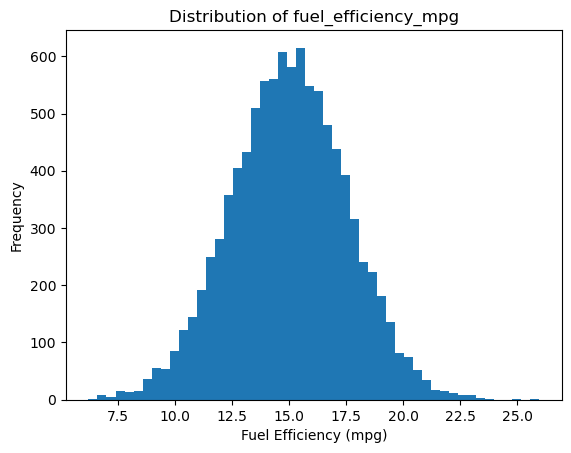

In [4]:
plt.hist(df_final['fuel_efficiency_mpg'], bins=50)
plt.xlabel('Fuel Efficiency (mpg)')
plt.ylabel('Frequency')
plt.title('Distribution of fuel_efficiency_mpg')
plt.show()

### Question 1

There's one column with missing values. What is it?

* `'horsepower'`

In [5]:
df_final.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 149

In [6]:
df_final['horsepower'].median()

149.0

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [7]:

np.random.seed(42)

n = len(df_final)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_final.iloc[idx]

n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_val

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values


del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0

In [8]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

#### Option 1: Fill missing 'horsepower' with 0

In [9]:
X_train_0 = df_train.fillna(0).values
X_val_0 = df_val.fillna(0).values

w0_0, w_0 = train_linear_regression(X_train_0, y_train)

y_pred_0 = w0_0 + X_val_0.dot(w_0)
rmse_0 = rmse(y_val, y_pred_0)

print(f"RMSE (fill with 0): {round(rmse_0, 2)}")

RMSE (fill with 0): 0.52


#### Option 2: Fill missing 'horsepower' with mean (from train only)

In [10]:
mean_hp = df_train['horsepower'].mean()

X_train_mean = df_train.fillna(mean_hp).values
X_val_mean = df_val.fillna(mean_hp).values

w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

y_pred_mean = w0_mean + X_val_mean.dot(w_mean)
rmse_mean = rmse(y_val, y_pred_mean)

print(f"RMSE (fill with mean): {round(rmse_mean, 2)}")

RMSE (fill with mean): 0.46


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:
- 0


In [11]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = {}

for r in r_values:
    w0_r, w_r = train_linear_regression_reg(X_train_0, y_train, r=r)
    
    y_pred_r = w0_r + X_val_0.dot(w_r)
    score = rmse(y_val, y_pred_r)
    
    rmse_scores[r] = round(score, 2)
    
print("RMSE Result:")
print(rmse_scores)

best_r = min(rmse_scores, key=rmse_scores.get)
print(f"\nR value with best RMSE {best_r}")

RMSE Result:
{0: np.float64(0.52), 0.01: np.float64(0.52), 0.1: np.float64(0.52), 1: np.float64(0.52), 5: np.float64(0.52), 10: np.float64(0.52), 100: np.float64(0.52)}

R value with best RMSE 0


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?
- 0.006

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [12]:
rmse_list = []
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for seed in seeds:
    np.random.seed(seed)
    
    n = len(df_final)
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_shuffled_seed = df_final.iloc[idx]
    
    n_train = int(n * 0.6)
    n_val = int(n * 0.2)
    n_test = n - n_train - n_val
    
    df_train_seed = df_shuffled_seed.iloc[:n_train].copy()
    df_val_seed = df_shuffled_seed.iloc[n_train:n_train+n_val].copy()
    
    y_train_seed = df_train_seed.fuel_efficiency_mpg.values
    y_val_seed = df_val_seed.fuel_efficiency_mpg.values
    
    del df_train_seed['fuel_efficiency_mpg']
    del df_val_seed['fuel_efficiency_mpg']
    
    X_train_seed_0 = df_train_seed.fillna(0).values
    X_val_seed_0 = df_val_seed.fillna(0).values
    
    w0_s, w_s = train_linear_regression(X_train_seed_0, y_train_seed)
    y_pred_s = w0_s + X_val_seed_0.dot(w_s)
    
    score_s = rmse(y_val_seed, y_pred_s)
    rmse_list.append(score_s)

std_dev = np.std(rmse_list)
print(f"Standard deviation : {round(std_dev, 3)}")

Standard deviation : 0.007


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:
- 0.515


In [13]:
np.random.seed(9)
n = len(df_final)
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled_9 = df_final.iloc[idx]

n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_val

df_train_9 = df_shuffled_9.iloc[:n_train].copy()
df_val_9 = df_shuffled_9.iloc[n_train:n_train+n_val].copy()
df_test_9 = df_shuffled_9.iloc[n_train+n_val:].copy()

df_full_train = pd.concat([df_train_9, df_val_9]).reset_index(drop=True)
y_full_train = df_full_train.fuel_efficiency_mpg.values
del df_full_train['fuel_efficiency_mpg']

y_test_9 = df_test_9.fuel_efficiency_mpg.values
del df_test_9['fuel_efficiency_mpg']

X_full_train_0 = df_full_train.fillna(0).values
X_test_0 = df_test_9.fillna(0).values

w0_final, w_final = train_linear_regression_reg(X_full_train_0, y_full_train, r=0.001)

y_pred_test = w0_final + X_test_0.dot(w_final)
rmse_test = rmse(y_test_9, y_pred_test)

print(f"RMSE : {round(rmse_test, 3)}")

RMSE : 0.516
